In [19]:
import pandas as pd
import networkx as nx
import pickle
import ast

df1 = pd.read_csv('../reading_and_cleaning/guest_host_cleaned_podcasts.csv', sep='\t', index_col=0)
split_hosts = pd.read_csv('../reading_and_cleaning/split_hosts.csv', sep='\t', index_col=0)
guest_durations = pd.read_csv('../reading_and_cleaning/guest_durations.csv', sep='\t', index_col=0)
G2 = nx.from_pandas_dataframe(guest_durations, 'guests', 'hosts', edge_attr=['duration'], create_using=nx.Graph())

podcast_info = pd.read_csv('../reading_and_cleaning/meta_podcast_info.csv', sep='\t', index_col=0)
host_list = []
for index1, row1 in podcast_info.iterrows():
    hosts = ast.literal_eval(row1['Hosts'])
    for host in hosts:
        host_list.append(host)

host_list = set(host_list)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

top_cat = load_obj('top_categories')
top_cat_num = pd.DataFrame.from_dict(top_cat, orient='index')
top_cat_num = top_cat_num[0].astype('category').cat.codes.to_dict()

G2 = nx.from_pandas_dataframe(guest_durations, 'guests', 'hosts', edge_attr=['duration'], create_using=nx.Graph())
nx.set_node_attributes(G2, 'cat', top_cat) 
print(nx.number_of_nodes(G2))

guest_durations_podcast = pd.read_csv('../reading_and_cleaning/guest_durations_podcast.csv', sep='\t', index_col=0)
len(list(G2))

remove = []
for n in G2:
    guest_df = guest_durations_podcast[guest_durations_podcast['guests']==n].copy()
    if(len(guest_df)<=2):
        remove.append(n)
        
print(len(remove))
        
remove2 = [r for r in remove if r not in host_list]

print(len(remove2))

G2.remove_nodes_from(remove2)
nx.number_of_nodes(G2)

12637
11390
11316


1321

In [26]:
import plotly.plotly as py
from plotly.graph_objs import *


pos = nx.spring_layout(G2, k=30, iterations=500, weight="duration")

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G2,ncenter)

nx.set_node_attributes(G2, 'pos', pos)

edge_trace = Scatter(
    x=[],
    y=[],
    line=Line(width=0.5,color='#888'),
    #line=Line(width=0.5,colorscale='Electric',color=[]),
    hoverinfo='none',
    mode='lines',
    showlegend=False)


node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    name=[],
    showlegend=True,
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'G2reys' | 'G2reens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIG2nBu'
        colorscale='Rainbow',    #'YIG2nBu',
        reversescale=True,
        color=[],
        #name=[],
        size=[],
        colorbar=dict(
            thickness=15,
            title='Categories',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=1)))

guest_durations = pd.read_csv('../reading_and_cleaning/guest_durations.csv', sep='\t', index_col=0)
G1 = nx.from_pandas_dataframe(guest_durations, 'guests', 'hosts', edge_attr=['duration'], create_using=nx.DiGraph())

pr = nx.pagerank(G1, weight='duration')

for edge in G2.edges():
    x0, y0 = G2.node[edge[0]]['pos']
    x1, y1 = G2.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]
    #edge_trace['line']['width'].append(0.3*(np.log(G2[edge[0]][edge[1]]['duration']+1)-6))
    #edge_trace['line']['color'].append(G2[edge[0]][edge[1]]['duration'])
    #print(0.3*(np.log(G2[edge[0]][edge[1]]['duration'])-6))
    
for node in G2.nodes():
    x, y = G2.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

for node, adjacencies in enumerate(G2.adjacency_list()):
    #print(G2.nodes()[node])
    #node_trace['marker']['color'].append(len(adjacencies))
    node_trace['marker']['color'].append(top_cat_num[G2.nodes()[node]])
    node_trace['name'].append(top_cat[G2.nodes()[node]])
    node_trace['marker']['size'].append(10+300*(pr[G2.nodes()[node]]))
    node_info = G2.nodes()[node]   #'# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

/Users/jcbrooks/anaconda3/lib/python3.5/site-packages/networkx/generators/stochastic.py:56: UserWarning:

zero out-degree for node Justine Marino

/Users/jcbrooks/anaconda3/lib/python3.5/site-packages/networkx/generators/stochastic.py:56: UserWarning:

zero out-degree for node Eden Dranger

/Users/jcbrooks/anaconda3/lib/python3.5/site-packages/networkx/generators/stochastic.py:56: UserWarning:

zero out-degree for node John Calipari

/Users/jcbrooks/anaconda3/lib/python3.5/site-packages/networkx/generators/stochastic.py:56: UserWarning:

zero out-degree for node Chris Evert



In [27]:
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='People Network Graph',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                width=1000,
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="TV & Film<br><br><br><br>Sports & Recreation<br><br><br><br>Society & Culture<br><br><br><br>Science & Medicine<br><br><br><br>Religion & Spirituality<br><br><br>News & Politics<br><br><br><br>Music<br><br><br>Health<br><br><br><br>Education<br><br><br>Comedy<br><br><br>Business<br><br><br>Arts",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=1.03, y=0.99) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='test_network')

In [22]:
top_cat['Brian Miller']

'Music'

In [28]:
podcast_info = pd.read_csv('../reading_and_cleaning/meta_podcast_info.csv', sep='\t', index_col=0)
similarities = pd.read_csv('podcast_similarities.csv', sep='\t', index_col=0)
similarities = similarities[similarities['score']>0]

G1 = nx.from_pandas_dataframe(similarities, 'podcast1', 'podcast2', edge_attr=['score'], create_using=nx.Graph())

In [29]:
import plotly.plotly as py
from plotly.graph_objs import *
import numpy as np


pos = nx.spring_layout(G1, k=100, iterations=500, weight="score")
# pos = nx.spectral_layout(G1, weight="score")

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G1,ncenter)

nx.set_node_attributes(G1, 'pos', pos)

edge_trace = Scatter(
    x=[],
    y=[],
    line=Line(width=0.5,color='#888'),
    #line=Line(width=0.5,colorscale='Electric',color=[]),
    hoverinfo='none',
    mode='lines',
    showlegend=False)


node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
#     name=[],
    showlegend=True,
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'G2reys' | 'G2reens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIG2nBu'
        colorscale='Hot',    #'YIG2nBu',
        reversescale=False,
        color=[],
        #name=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for edge in G1.edges():
    x0, y0 = G1.node[edge[0]]['pos']
    x1, y1 = G1.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]
    #edge_trace['line']['width'].append(0.3*(np.log(G2[edge[0]][edge[1]]['duration']+1)-6))
    #edge_trace['line']['color'].append(G2[edge[0]][edge[1]]['duration'])
    #print(0.3*(np.log(G2[edge[0]][edge[1]]['duration'])-6))
    
for node in G1.nodes():
    x, y = G1.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

for node, adjacencies in enumerate(G1.adjacency_list()):
    #print(G1.nodes()[node])
    node_trace['marker']['color'].append(len(adjacencies))
#     node_trace['marker']['color'].append(top_cat_num[G2.nodes()[node]])
#     node_trace['name'].append(top_cat[G2.nodes()[node]])
#     node_trace['marker']['size'].append(10+300*(pr[G2.nodes()[node]]))
    node_info = G1.nodes()[node]   #'# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)
    
    

In [30]:
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='Podcast Network Graph',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=1.03, y=0.96) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='podcast_network')

In [31]:
# import pandas as pd
# import networkx as nx
# import numpy as np
# import ast

# guest_durations = pd.read_csv('../reading_and_cleaning/guest_durations.csv', sep='\t', index_col=0)
# G = nx.from_pandas_dataframe(guest_durations, 'guests', 'hosts', edge_attr=['duration'], create_using=nx.Graph())


# podcast_info = pd.read_csv('../reading_and_cleaning/meta_podcast_info.csv', sep='\t', index_col=0)
# host_list = []
# for index1, row1 in podcast_info.iterrows():
#     hosts = ast.literal_eval(row1['Hosts'])
#     for host in hosts:
#         host_list.append(host)

# host_list = set(host_list)
# print("length of host list", len(host_list))

# people = G.nodes()
# num_people = len(people)

# guest_list = [p for p in people if p not in host_list]
# print("length of guest list", len(guest_list))



# # G_guests.remove_nodes_from(host_list)
# # G_hosts.remove_nodes_from(guest_list)

# # print(len(G_hosts), len(G_guests))
# # G_guests.degree()

# degrees = G.degree()
# degrees_guests = []
# degrees_hosts = []
# degrees_all = []

# for key, value in degrees.items():
#     degrees_all.append(value)
#     if(key in guest_list):
#         degrees_guests.append(value)
#     if(key in host_list):
#         degrees_hosts.append(value)


# degree_values_guests = sorted(set(degrees_guests))
# degree_values_hosts = sorted(set(degrees_hosts))

# degree_values = sorted(set(degrees_all))
# max_degree = max(degree_values)

# degree_list = np.linspace(max_degree, 1, max_degree)
# # print(degrees_all)
# cdf = []
# for i in degree_list:
#     f = [j for j in degrees_all if j <= i]
#     frac = len(f)/num_people
#     cdf.append(frac)
    
# print(cdf)
    
# # histogram_guests = [list(degrees_guests.values()).count(i)/float(nx.number_of_nodes(G_guests)) for i in degree_guests_values]

# freq_guests = [list(degrees_guests).count(i) for i in degree_values_guests]
# freq_hosts = [list(degrees_hosts).count(i) for i in degree_values_hosts]

# m_list = np.linspace(1,20,20)
# a_list = np.linspace(0,1,51)
# # print(m_list, a_list)

# # print(len(cdf), num_people, len(degree_list))

# cdf_len = len(cdf)

# min_error = 1e100
# for m in m_list:
#     for a in a_list:
#         F_model = [(1-((m+m*a*2/(1-a))/(d+a*m*2/(1-a)))**(2/(1-a))) for d in degree_list]
#         model_error = 0
#         for d in range(cdf_len):
#             model_error += ((cdf[d]-F_model[d])/cdf[d])**2.0
# #         print(model_error)
#         if(model_error<min_error):
#             min_error=model_error
#             print(m, a, min_error)
#             best_a = a
#             best_m = m
            
# print(best_m, best_a)
# best_a = 0.99
# # best_m = 10
# F_mod = [(1-((best_m+best_m*best_a*2/(1-best_a))/(d+best_a*best_m*2/(1-best_a)))**(2/(1-best_a))) for d in degree_list]

In [32]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab

# params = {'legend.fontsize': 'xx-large',
#           'figure.figsize': (10, 5),
#          'axes.labelsize': 'xx-large',
#          'axes.titlesize':'xx-large',
#          'xtick.labelsize':'xx-large',
#          'ytick.labelsize':'xx-large'}
# pylab.rcParams.update(params)



# ccdf = [(1-f) for f in cdf]
# mod_ccdf  = [(1-f) for f in F_mod]
# # print(ccdf)
# plt.scatter(degree_list, ccdf, label='Empirical Distribution')
# plt.scatter(degree_list, mod_ccdf, color='Firebrick', label='Model Fit')

# plt.xlabel('Degree')
# plt.ylabel('1-F(d)')

# plt.xscale('log')
# plt.yscale('log')

# plt.xlim([0.9,1200])
# plt.ylim([1e-5,1])

# plt.legend()

# plt.gcf()
# plt.draw()
# plt.savefig('plots/cumulative_degree_distribution.pdf',format='pdf')
# plt.savefig('plots/cumulative_degree_distribution.png',format='png')
# plt.show()

In [33]:


# params = {'legend.fontsize': 'xx-large',
#           'figure.figsize': (10, 5),
#          'axes.labelsize': 'xx-large',
#          'axes.titlesize':'xx-large',
#          'xtick.labelsize':'xx-large',
#          'ytick.labelsize':'xx-large'}
# pylab.rcParams.update(params)

# # plt.scatter(degree_values_guests, freq_guests, label='Guests only')
# # plt.scatter(degree_values_hosts, freq_hosts, color='Firebrick', label='Hosts')

# bins=np.logspace(0,3,50)
# plt.hist(degrees_guests, log=False, bins=bins, histtype='step', label='Guests only')
# plt.hist(degrees_hosts, log=False, bins=bins, histtype='step', color='Firebrick', label='Hosts')

# plt.xlabel('Degree')
# plt.ylabel('Frequency')

# plt.xscale('log')
# plt.yscale('log')

# plt.legend()

# plt.gcf()
# plt.draw()
# plt.savefig('plots/degree_distribution.pdf',format='pdf')
# plt.savefig('plots/degree_distribution.png',format='png')
# plt.show()

In [34]:
df1 = pd.read_csv('../reading_and_cleaning/guest_host_cleaned_podcasts.csv', sep='\t', index_col=0)
podcasts_per_guest = df1.groupby(['guests'])['podcast'].count()
visits = sorted(set(podcasts_per_guest.values))
histogram = [list(podcasts_per_guest.values).count(i) for i in visits]

In [36]:
# f = plt.figure()
# plt.bar(visits, histogram)
# plt.xlabel('Visits per podcast per guest')
# plt.ylabel('Number of guests')
# print(histogram)
# # plt.xscale('log')
# plt.yscale('log')

# plt.xlim([0,50])

# plt.gcf()
# plt.draw()
# plt.savefig('visits_per_podcast_per_guest_hist.png',format='png')
# plt.show()

In [37]:
# split_hosts = pd.read_csv('../reading_and_cleaning/split_hosts.csv', sep='\t', index_col=0)

# split_hosts['date'] = pd.to_datetime(split_hosts['date'])
# split_hosts.sort_values(by='date', inplace=True)
# split_hosts

In [38]:
# from datetime import datetime as dt
# host_first = split_hosts[split_hosts['hosts']=='Jesse Thorn']['date'].iloc[0]
# guest_first = split_hosts[split_hosts['guests']=='Jesse Thorn']['date'].iloc[0]

# print(host_first, guest_first, host_first<guest_first)

In [41]:
import pickle
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

    
top_cat_dict = load_obj('top_categories')
top_cat_dict
df_top_cat = pd.DataFrame(list(top_cat_dict.items()), columns=['num', 'cat'])
top_cats = df_top_cat.groupby(['cat']).count()
top_cats.reset_index(inplace=True)
top_cats.sort_values(by='num', inplace=True, ascending=False)
top_cats.reset_index(inplace=True, drop=True)
top_cats
cat_dict = {}
for index, row in top_cats.iterrows():
    cat_dict[row['cat']] = index
    
cat_dict
top_cat_names = top_cats['cat'].values
top_cat_nums = top_cats['num'].values



podcast_info = pd.read_csv('../reading_and_cleaning/meta_podcast_info.csv', sep='\t', index_col=0)
guest_durations_podcast = pd.read_csv('../reading_and_cleaning/guest_durations_podcast.csv', sep='\t', index_col=0)



guest_durations = pd.read_csv('../reading_and_cleaning/guest_durations.csv', sep='\t', index_col=0)
G2 = nx.from_pandas_dataframe(guest_durations, 'guests', 'hosts', edge_attr=['duration'], create_using=nx.Graph())


import ast

w = top_cats['num'].values/sum(top_cats['num'].values)
w_dict = {}
for i in range(len(top_cats)):
    w_dict[top_cats['cat'].values[i]] = w[i]

podcast_info = pd.read_csv('../reading_and_cleaning/meta_podcast_info.csv', sep='\t', index_col=0)
guest_durations_podcast = pd.read_csv('../reading_and_cleaning/guest_durations_podcast.csv', sep='\t', index_col=0)
bias_dict = {}
for index, row in podcast_info.iterrows():
    podcast_df = guest_durations_podcast[guest_durations_podcast['podcast']==row['Podcast Name']].copy()
    num_guests = len(podcast_df)
    cats = ast.literal_eval(row['categories'])
    top_cat_podcast = cats[0]
    wi = w_dict[top_cat_podcast]
    num_top_cat = 0
    num_all_cat = 0
    for index1, row1 in podcast_df.iterrows():
        if(top_cat_dict[row1['guests']]==top_cat_podcast):
            num_top_cat+=1
    qi = num_top_cat/num_guests
    if(qi==1):
        beta_i = 'Full Bias'
    else:
        beta_i = str(np.round(np.log(wi)/(np.log(qi)),1))
#     print(row['Podcast Name'], beta_i)
    bias_dict[row['Podcast Name']] = np.log(wi)/(np.log(qi)-1e-4)
    

    
cat_avg_guests = []
cat_std_guests = []
cat_avg_bias = []
cat_std_bias = []

for cat in top_cats['cat'].values:
    num_podcasts=0
    num_guests = []
    bias = []
    for index, row in podcast_info.iterrows():
        cats = ast.literal_eval(row['categories'])
        if(cat==cats[0]):
            podcast_df = guest_durations_podcast[guest_durations_podcast['podcast']==row['Podcast Name']].copy()
            num_guests.append(len(podcast_df))
            bias.append(bias_dict[row['Podcast Name']])
    cat_avg_guests.append(np.mean(num_guests))
    cat_std_guests.append(np.std(num_guests))
    cat_avg_bias.append(np.mean(bias))
    cat_std_bias.append(np.std(bias))

    
    
nx.set_node_attributes(G2, 'category', top_cat_dict)
cat_matrix = nx.attribute_mixing_matrix(G2, 'category', normalized=False, mapping=cat_dict)



podcast_info = pd.read_csv('../reading_and_cleaning/meta_podcast_info.csv', sep='\t', index_col=0)

cats_1 = np.zeros(14)
cats_2 = np.zeros(14)
cats_3 = np.zeros(14)
cats_4 = np.zeros(14)

for index, row in podcast_info.iterrows():
    cats = ast.literal_eval(row['categories'])
    for i in range(len(cats)):
#         print(cats[i])
        if(cats[i] not in top_cats['cat'].values):
            continue
        if(i==0):
            cats_1[cat_dict[cats[i]]]+=1
        if(i==1):
            cats_2[cat_dict[cats[i]]]+=1
        if(i==2):
            cats_3[cat_dict[cats[i]]]+=1
        if(i==3):
            cats_4[cat_dict[cats[i]]]+=1

In [42]:
import plotly.plotly as py
from plotly.graph_objs import *

trace1 = {
  "x": top_cat_names, 
  "y": top_cat_names, 
  "z": cat_matrix,
#   "colorbar": {"title": ""}, 
  'colorscale': [
        [0, 'rgb(240,249,232)'],        #0
        [1./1000, 'rgb(186,228,188)'], #10
        [1./100, 'rgb(123,204,196)'],  #100
        [1./10, 'rgb(67,162,202)'],   #1000
        [1., 'rgb(8,104,172)'],       #10000
#         [1., 'rgb(8,104,172)'],             #100000
  ],
  "showscale": False,
  "dx": 1, 
  "dy": 1, 
  "name": "trace 0", 
  "showlegend": False, 
  "type": "heatmap", 
  "uid": "248f71", 
  "x0": 0, 
  "xsrc": "Dreamshot:4293:698862", 
  "y0": 0, 
  "ysrc": "Dreamshot:4293:83a556", 
  "zauto": False, 
  "zmax": 22540, 
  "zmin": 0, 
  "zsrc": "Dreamshot:4293:-698862,83a556"
}
# data = Data([trace1])
layout1 = {
  "autosize": False, 
  "bargap": 0.2, 
  "bargroupgap": 0, 
  "barmode": "stack", 
  "boxgap": 0.3, 
  "boxgroupgap": 0.3, 
  "boxmode": "overlay", 
  "dragmode": "zoom", 
  "font": {
    "color": "rgb(33, 33, 33)", 
    "family": "Raleway, sans-serif", 
    "size": 12
  }, 
  "height": 800, 
  "hidesources": False, 
  "hovermode": "x", 
  "legend": {
    "bgcolor": "#fff", 
    "bordercolor": "#000", 
    "borderwidth": 1, 
    "font": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "traceorder": "normal"
  }, 
  "margin": {
    "r": 50, 
    "t": 100, 
    "autoexpand": True, 
    "b": 80, 
    "l": 150, 
    "pad": 0
  }, 
  "paper_bgcolor": "#fff", 
  "plot_bgcolor": "#fff", 
  "separators": ".,", 
  "showlegend": False, 
  "title": "Category Mixing", 
  "titlefont": {
    "color": "", 
    "family": "", 
    "size": 0
  }, 
  "width": 850, 
  "xaxis": {
    "anchor": "y", 
    "autorange": True, 
    "autotick": True, 
    "domain": [0, 1], 
    "dtick": 1, 
    "exponentformat": "SI", 
    "gridcolor": "#ddd", 
    "gridwidth": 1, 
    "linecolor": "#000", 
    "linewidth": 1, 
    "mirror": False, 
    "nticks": 0, 
    "overlaying": False, 
    "position": 0, 
    "range": [-0.5, 11.5], 
    "rangemode": "normal", 
    "showexponent": "all", 
    "showgrid": False, 
    "showline": False, 
    "showticklabels": True, 
    "side": "bottom", 
    "tick0": 0, 
    "tickangle": "auto", 
    "tickcolor": "#000", 
    "tickfont": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "ticklen": 5, 
    "ticks": "", 
    "tickwidth": 1, 
    "title": "", 
    "titlefont": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "type": "category", 
    "zeroline": False, 
    "zerolinecolor": "#000", 
    "zerolinewidth": 1
  }, 
  "yaxis": {
    "anchor": "x", 
    "autorange": True, 
    "autotick": True, 
    "domain": [0, 1], 
    "dtick": 1, 
    "exponentformat": "SI", 
    "gridcolor": "#ddd", 
    "gridwidth": 1, 
    "linecolor": "#000", 
    "linewidth": 1, 
    "mirror": False, 
    "nticks": 0, 
    "overlaying": False, 
    "position": 0, 
    "range": [-0.5, 30.5], 
    "rangemode": "normal", 
    "showexponent": "all", 
    "showgrid": False, 
    "showline": False, 
    "showticklabels": True, 
    "side": "left", 
    "tick0": 0, 
    "tickangle": "auto", 
    "tickcolor": "#000", 
    "tickfont": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "ticklen": 5, 
    "ticks": "", 
    "tickwidth": 1, 
    "title": "", 
    "titlefont": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "type": "category", 
    "zeroline": False, 
    "zerolinecolor": "#000", 
    "zerolinewidth": 1
  }
}

In [43]:
fig = Figure(data=Data([trace1]),
             layout=layout1)
py.iplot(fig, filename='category_matrix')

In [44]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top_cat_names,
            y=top_cat_nums
    )]

layout = go.Layout(
    yaxis=dict(
        type='log',
        autorange=True
    ),
    title="People's Top Categories",
    titlefont=dict(size=16),
    width=850,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='category_bar_chart')

In [45]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=top_cat_names,
    y=cats_1,
    name='1st Category'
)
trace2 = go.Bar(
    x=top_cat_names,
    y=cats_2,
    name='2nd Category'
)
trace3 = go.Bar(
    x=top_cat_names,
    y=cats_3,
    name='3rd Category'
)
trace4 = go.Bar(
    x=top_cat_names,
    y=cats_3,
    name='4th Category'
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
#     yaxis=dict(
#         type='log',
#         autorange=True
#     ),
    barmode='stack',
    title="Podcast Categories",
    titlefont=dict(size=16),
    width=850,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='podcast_categories')

In [46]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top_cat_names,
            y=cat_avg_guests,
        error_y=dict(
        type='data',
        array=cat_std_guests,
        visible=True
    ))]

layout = go.Layout(
#     yaxis=dict(
#         type='log',
#         autorange=True
#     ),
    title="Average Number of Guests per Podcast per Category",
    titlefont=dict(size=16),
    width=850,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='avg_guests_per_podcast_per_category')

In [47]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top_cat_names,
            y=cat_avg_bias,
#     error_y=dict(
#         type='data',
#         array=cat_std_bias,
#         visible=True
#     )
    )]

layout = go.Layout(
    yaxis=dict(
        type='log',
        autorange=True
    ),
    title="Average Bias per Category",
    titlefont=dict(size=16),
    width=850,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='category_bias')

In [48]:
import pandas as pd
measures = pd.read_csv('evolution_of_measures.csv', sep='\t', index_col=0)
measures

,avg_clust,transitivity,avg_path,density,num_people,num_podcasts,dates,day_num
0,0.000000,0.000000,1.981651,0.018349,311,8,2010-01-01,0
1,0.000000,0.000000,1.982143,0.017857,327,10,2010-02-01,31
2,0.000000,0.000000,1.982609,0.017391,346,11,2010-03-01,59
3,0.000000,0.000000,1.983193,0.016807,366,12,2010-04-01,90
4,0.002495,0.000840,3.755220,0.025035,383,12,2010-05-01,120
5,0.002336,0.000806,3.783889,0.023512,400,13,2010-06-01,151
6,0.009711,0.002167,3.917437,0.020095,422,14,2010-07-01,181
7,0.008974,0.002093,3.925759,0.018491,438,15,2010-08-01,212
8,0.008620,0.002190,3.799453,0.016769,462,15,2010-09-01,243
9,0.010892,0.002568,3.806128,0.015438,485,16,2010-10-01,273


In [49]:
import scipy
from scipy import optimize
import numpy as np

scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  measures['day_num'],  measures['num_people'],  p0=(300, 0.001))

6.13534785e+02*np.exp(9.86796867e-04*(3642))

22318.052328595688

/Users/jcbrooks/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



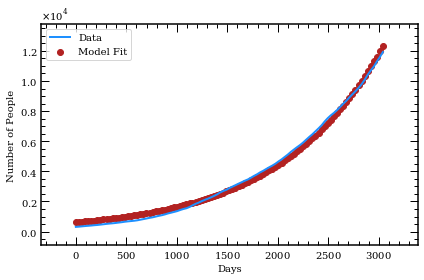

In [50]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=False

# print(measures['day_num'].values)
days = measures['day_num'].values
people = measures['num_people'].values

plt.plot(days, people, label='Data')
plt.scatter(days, 6.13534785e+02*np.exp(9.86796867e-04*days), color='Firebrick', label='Model Fit')
# print(measures['num_people'].values)
# print(type(measures['day_num'].values[0]))


# x=measures['num_people'].values[:85]
# # print(x[84], type(x[84]))
# print(x)
# plt.plot(x,x, label=r'10^{4}')

plt.xlabel('Days')
plt.ylabel('Number of People')

# plt.xscale('log')
# plt.yscale('log')

# plt.xlim([0.9,1200])
# plt.ylim([1e-5,1])

plt.legend()

plt.gcf()
# plt.draw()
# plt.savefig('plots/cumulative_degree_distribution.pdf',format='pdf')
# plt.savefig('plots/cumulative_degree_distribution.png',format='png')
plt.show()

In [51]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=measures['dates'],
    y=measures['avg_clust'],
    name='Average Clustering Coefficient'
)
trace2 = go.Scatter(
    x=measures['dates'],
    y=measures['transitivity'],
    name='Transitivity'
)
trace3 = go.Scatter(
    x=measures['dates'],
    y=measures['avg_path'],
    name='Average Shortest Path'
)
trace4 = go.Scatter(
    x=measures['dates'],
    y=measures['density'],
    name='Density'
)
trace5 = go.Scatter(
    x=measures['dates'],
    y=measures['num_podcasts'],
    name='Number of Podcasts'
)
trace6 = go.Scatter(
    x=measures['dates'],
    y=measures['num_people'],
    name='Number of People'
)

fig = tools.make_subplots(rows=6, cols=1)

fig.append_trace(trace6, 1, 1)
fig.append_trace(trace5, 2, 1)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace3, 4, 1)
fig.append_trace(trace2, 5, 1)
fig.append_trace(trace1, 6, 1)

fig['layout'].update(height=1000, width=1000, title='Evolution of Measures of the Network')
py.iplot(fig, filename='evolution_of_measures')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]
[ (5,1) x5,y5 ]
[ (6,1) x6,y6 ]



In [52]:
pr_evol = pd.read_csv('pr_evol.csv', sep='\t', index_col=0)
pr_evol.columns

Index(['Joe Rogan', 'Duncan Trussell', 'Ari Shaffir', 'Chris Hardwick',
       'Jesse Thorn', 'Alison Rosen', 'Marshall Poe', 'Jordan Morris',
       'Bert Kreischer', 'Joey Diaz', 'dates'],
      dtype='object')

In [53]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[0]],
    name = pr_evol.columns[0],
)
trace2 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[1]],
    name = pr_evol.columns[1],
)
trace3 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[2]],
    name = pr_evol.columns[2],
)
trace4 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[3]],
    name = pr_evol.columns[3],
)
trace5 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[4]],
    name = pr_evol.columns[4],
)
trace6 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[5]],
    name = pr_evol.columns[5],
)
trace7 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[6]],
    name = pr_evol.columns[6],
)
trace8 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[7]],
    name = pr_evol.columns[7],
)
trace9 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[8]],
    name = pr_evol.columns[8],
)
trace10 = go.Scatter(
    x=pr_evol['dates'],
    y=pr_evol[pr_evol.columns[9]],
    name = pr_evol.columns[9],
)
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

layout = go.Layout(
    title="Pagerank Evolution",
    titlefont=dict(size=16),
    height=600,
    width=1000,
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='pr_evol')

In [54]:
close_evol = pd.read_csv('close_evol.csv', sep='\t', index_col=0)
close_evol.columns

Index(['Joe Rogan', 'Pete Holmes', 'Chris Hardwick', 'Bert Kreischer',
       'Ari Shaffir', 'Alison Rosen', 'Duncan Trussell', 'Doug Benson',
       'Jesse Thorn', 'Moshe Kasher', 'dates'],
      dtype='object')

In [55]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[0]],
    name = close_evol.columns[0],
)
trace2 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[1]],
    name = close_evol.columns[1],
)
trace3 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[2]],
    name = close_evol.columns[2],
)
trace4 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[3]],
    name = close_evol.columns[3],
)
trace5 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[4]],
    name = close_evol.columns[4],
)
trace6 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[5]],
    name = close_evol.columns[5],
)
trace7 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[6]],
    name = close_evol.columns[6],
)
trace8 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[7]],
    name = close_evol.columns[7],
)
trace9 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[8]],
    name = close_evol.columns[8],
)
trace10 = go.Scatter(
    x=close_evol['dates'],
    y=close_evol[close_evol.columns[9]],
    name = close_evol.columns[9],
)
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

layout = go.Layout(
    title="Closeness Centrality Evolution",
    titlefont=dict(size=16),
    height=600,
    width=1000,
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='close_evol')

In [56]:
auths_evol = pd.read_csv('auths_evol.csv', sep='\t', index_col=0)
auths_evol.columns

Index(['Cameron Esposito', 'Rhea Butcher', 'Chris Hardwick', 'Pete Holmes',
       'Jesse Thorn', 'Jay Larson', 'Ryan Sickler', 'Jordan Morris',
       'Alison Rosen', 'Joe Rogan', 'dates'],
      dtype='object')

In [57]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[0]],
    name = auths_evol.columns[0],
)
trace2 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[1]],
    name = auths_evol.columns[1],
)
trace3 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[2]],
    name = auths_evol.columns[2],
)
trace4 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[3]],
    name = auths_evol.columns[3],
)
trace5 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[4]],
    name = auths_evol.columns[4],
)
trace6 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[5]],
    name = auths_evol.columns[5],
)
trace7 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[6]],
    name = auths_evol.columns[6],
)
trace8 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[7]],
    name = auths_evol.columns[7],
)
trace9 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[8]],
    name = auths_evol.columns[8],
)
trace10 = go.Scatter(
    x=auths_evol['dates'],
    y=auths_evol[auths_evol.columns[9]],
    name = auths_evol.columns[9],
)
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

layout = go.Layout(
    title="Authority Score Evolution",
    titlefont=dict(size=16),
    height=600,
    width=1000,
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='auths_evol')

In [58]:
hubs_evol = pd.read_csv('hubs_evol.csv', sep='\t', index_col=0)
hubs_evol.columns

Index(['Pete Holmes', 'Nick Thune', 'Moshe Kasher', 'Jen Kirkman',
       'Kurt Braunohler', 'Kumail Nanjiani', 'Eddie Pepitone', 'Jonah Ray',
       'Ari Shaffir', 'Jackie Kashian', 'dates'],
      dtype='object')

In [59]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[0]],
    name = hubs_evol.columns[0],
)
trace2 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[1]],
    name = hubs_evol.columns[1],
)
trace3 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[2]],
    name = hubs_evol.columns[2],
)
trace4 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[3]],
    name = hubs_evol.columns[3],
)
trace5 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[4]],
    name = hubs_evol.columns[4],
)
trace6 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[5]],
    name = hubs_evol.columns[5],
)
trace7 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[6]],
    name = hubs_evol.columns[6],
)
trace8 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[7]],
    name = hubs_evol.columns[7],
)
trace9 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[8]],
    name = hubs_evol.columns[8],
)
trace10 = go.Scatter(
    x=hubs_evol['dates'],
    y=hubs_evol[hubs_evol.columns[9]],
    name = hubs_evol.columns[9],
)
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

layout = go.Layout(
    title="Hub Score Evolution",
    titlefont=dict(size=16),
    height=600,
    width=1000,
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='hubs_evol')

In [60]:
bt_evol = pd.read_csv('bt_evol.csv', sep='\t', index_col=0)
bt_evol.columns

FileNotFoundError: File b'bt_evol.csv' does not exist

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[0]],
    name = bt_evol.columns[0],
)
trace2 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[1]],
    name = bt_evol.columns[1],
)
trace3 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[2]],
    name = bt_evol.columns[2],
)
trace4 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[3]],
    name = bt_evol.columns[3],
)
trace5 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[4]],
    name = bt_evol.columns[4],
)
trace6 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[5]],
    name = bt_evol.columns[5],
)
trace7 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[6]],
    name = bt_evol.columns[6],
)
trace8 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[7]],
    name = bt_evol.columns[7],
)
trace9 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[8]],
    name = bt_evol.columns[8],
)
trace10 = go.Scatter(
    x=bt_evol['dates'],
    y=bt_evol[bt_evol.columns[9]],
    name = bt_evol.columns[9],
)
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

layout = go.Layout(
    title="Hub Score Evolution",
    titlefont=dict(size=16),
    height=600,
    width=1000,
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='bt_evol')

In [ ]:
import pickle

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

g_pr = load_obj('g_pr')
pr_values = [x for x in g_pr]
g_pr.values()

x = list(g_pr.values())
print(len(x))
x = [x for x in x if x>2e-5]
print(len(x))

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np


x = list(g_pr.values())
print(len(x))
x = [x for x in x if x>2e-5]
print(len(x))

x = np.log(x)

layout = go.Layout(
    xaxis=dict(
#         type='log',
        autorange=True,
        title='log(Pagerank)'
    ),
    yaxis=dict(
#         type='log',
        autorange=True
    ),
    title="Pagerank Histogram",
    titlefont=dict(size=16),
    width=1000,
    height=600,
)

data = [go.Histogram(x=x)]

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='pr_histogram')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

g_hubs = load_obj('g_hubs')
x = list(g_hubs.values())
print(len(x))
# x = [x for x in x if x>2e-5]
# print(len(x))

x = [x + 1e-8 for x in x]
x = np.log(x)

data = [go.Histogram(x=x)]

layout = go.Layout(
    xaxis=dict(
#         type='log',
        autorange=True,
        title='log(Hub Score)'
    ),
    yaxis=dict(
        type='log',
        autorange=True
    ),
    title="Hub Score Histogram",
    titlefont=dict(size=16),
    width=1000,
    height=600,
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='hubs_histogram')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

g_auths = load_obj('g_auths')
x = list(g_auths.values())
print(len(x))
x = [x for x in x if x>1e-6]
print(len(x))
# x = [x + 1e-6 for x in x]
# x = np.log(x)

data = [go.Histogram(x=x)]

layout = go.Layout(
    xaxis=dict(
#         type='log',
        autorange=True,
        title='Authority Score'
    ),
    yaxis=dict(
#         type='log',
        autorange=True
    ),
    title="Authority Score Histogram",
    titlefont=dict(size=16),
    width=1000,
    height=600,
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='auths_histogram')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

g_close = load_obj('g_close')
x = list(g_close.values())
print(len(x))
# x = [x for x in x if x>2e-5]
# print(len(x))

data = [go.Histogram(x=x)]

layout = go.Layout(
    xaxis=dict(
#         type='log',
        autorange=True,
        title='Closeness Centrality'
    ),
#     yaxis=dict(
#         type='log',
#         autorange=True
#     ),
    title="Closeness Centrality Histogram",
    titlefont=dict(size=16),
    width=1000,
    height=600,
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='close_histogram')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

g_bt = load_obj('g_bt')
x = list(g_bt.values())
print(len(x))
# x = [x for x in x if x>4e-5]
# print(len(x))

# print(np.min(x))
x = [x + 1e-10 for x in x]
x = np.log(x)

data = [go.Histogram(x=x)]

layout = go.Layout(
    xaxis=dict(
#         type='log',
        autorange=True,
        title='log(Betweenness Centrality)'
    ),
    yaxis=dict(
        type='log',
        autorange=True
    ),
    title="Betweenness Centrality Histogram",
    titlefont=dict(size=16),
    width=1000,
    height=600,
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='bt_histogram')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

g_degree = load_obj('g_degree')
x = list(g_degree.values())
print(len(x))
# x = [x for x in x if x>4e-5]
# print(len(x))

x = np.log(x)

data = [go.Histogram(x=x)]

layout = go.Layout(
    xaxis=dict(
#         type='log',
        autorange=True,
        title='log(Degree Centrality)'
    ),
    yaxis=dict(
        type='log',
        autorange=True
    ),
    title="Degree Centrality Histogram",
    titlefont=dict(size=16),
    width=1000,
    height=600,
    
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='degree_histogram')

In [ ]:
podcast_info = pd.read_csv('meta_podcast_info.csv', sep='\t', index_col=0)
podcast_info

In [ ]:
import pandas as pd
test_probs = pd.read_csv('test_probs.csv', sep='\t')
final_probs = pd.read_csv('final_probs.csv', sep='\t')

test_probs['0']

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
x0 = test_probs['0']
x1 = final_probs['0']

trace1 = go.Histogram(
    x=x0,
    histnorm='count',
    name='Test set',
#     xbins=dict(
#         start=-4.0,
#         end=3.0,
#         size=0.5
#     ),
#     marker=dict(
#         color='#FFD7E9',
#     ),
#     opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='Predictions',
#     xbins=dict(
#         start=-3.0,
#         end=4,
#         size=0.5
#     ),
#     marker=dict(
#         color='#EB89B5'
#     ),
#     opacity=0.75
)
data = [trace1, trace2]

layout = go.Layout(
    title='Histogram of Predicted Probabilities',
    xaxis=dict(
        title='Probability'
    ),
    yaxis=dict(
        title='Count',
        type='log',
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='probs_hist')

In [ ]:
import pandas as pd

p_info = pd.read_csv('p_info.csv', sep='\t', index_col=0)

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
x0 = p_info['hub_leader_score']
x1 = p_info['bt_diff_leader_score']

trace1 = go.Histogram(
    x=x0,
#     histnorm='count',
    name='Hub Leadership Scores',
#     xbins=dict(
#         start=-4.0,
#         end=3.0,
#         size=0.5
#     ),
#     marker=dict(
#         color='#FFD7E9',
#     ),
#     opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='New Leadership Scores',
#     xbins=dict(
#         start=-3.0,
#         end=4,
#         size=0.5
#     ),
#     marker=dict(
#         color='#EB89B5'
#     ),
#     opacity=0.75
)
data = [trace1, trace2]

layout = go.Layout(
    title='Histogram of Leadership Scores',
    width=1000,
    height=600,
#     xaxis=dict(
#         title='Probability'
#     ),
    yaxis=dict(
        title='Count',
        type='log',
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='leader_hist')

In [ ]:
p_info[100:150]